<a href="https://colab.research.google.com/github/kevintah/simonsAlgorithm/blob/main/simonsAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-7e48qh1w
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-7e48qh1w
     |████████████████████████████████| 6.5 MB 3.9 MB/s 
     |████████████████████████████████| 18.0 MB 355 kB/s 
     |████████████████████████████████| 240 kB 51.8 MB/s 
     |████████████████████████████████| 198 kB 53.7 MB/s 
     |████████████████████████████████| 112 kB 63.0 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 49.9 MB/s 
     |████████████████████████████████| 37.5 MB 1.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 943 kB 51.4 MB/s 


In [3]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [4]:
simon = QuantumCircuit(4,4)
# encode inputs in qubits 0 and 1
simon.h(0)
simon.h(1) 
simon.barrier()
simon.cx(0,2) 
simon.cx(0,3) 
simon.cx(1,2) 
simon.cx(1,3) 
simon.barrier()
# extract outputs
simon.measure(2,0)
simon.measure(3,1)
simon.barrier()

simon.h(0)
simon.h(1)
simon.barrier()
simon.measure(0,2)
simon.measure(1,3)
simon.draw()

┌───┐ ░                      ░        ░ ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░───■────■─────────────░────────░─┤ H ├─░─┤M├───
     ├───┤ ░   │    │             ░        ░ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─░───┼────┼────■────■───░────────░─┤ H ├─░──╫─┤M├
     └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ ┌─┐    ░ └───┘ ░  ║ └╥┘
q_2: ──────░─┤ X ├──┼──┤ X ├──┼───░─┤M├────░───────░──╫──╫─
           ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░ └╥┘┌─┐ ░       ░  ║  ║ 
q_3: ──────░──────┤ X ├─────┤ X ├─░──╫─┤M├─░───────░──╫──╫─
           ░      └───┘     └───┘ ░  ║ └╥┘ ░       ░  ║  ║ 
c: 4/════════════════════════════════╩══╩═════════════╩══╩═
                                     0  1             2  3

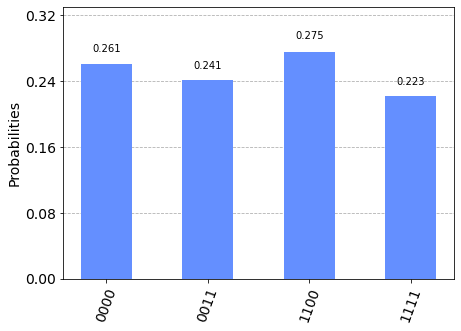

In [6]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(simon)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)